In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv("data.csv")
#Checking for null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [3]:
#Removing the id and unnamed column as they do not contain relevant info
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [4]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [5]:
#counting the number of patients with Benign or malignant in the dataset
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

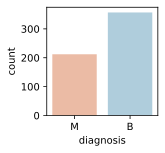

In [6]:
#Visualizing the distribution of the classes

plt.figure(figsize = (2,2))
sns.countplot(df.diagnosis, palette = 'RdBu')

In [8]:
#separating the dataset into independent features (x) and target feature (y)
y = df.diagnosis
x = df.drop('diagnosis', axis = 1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

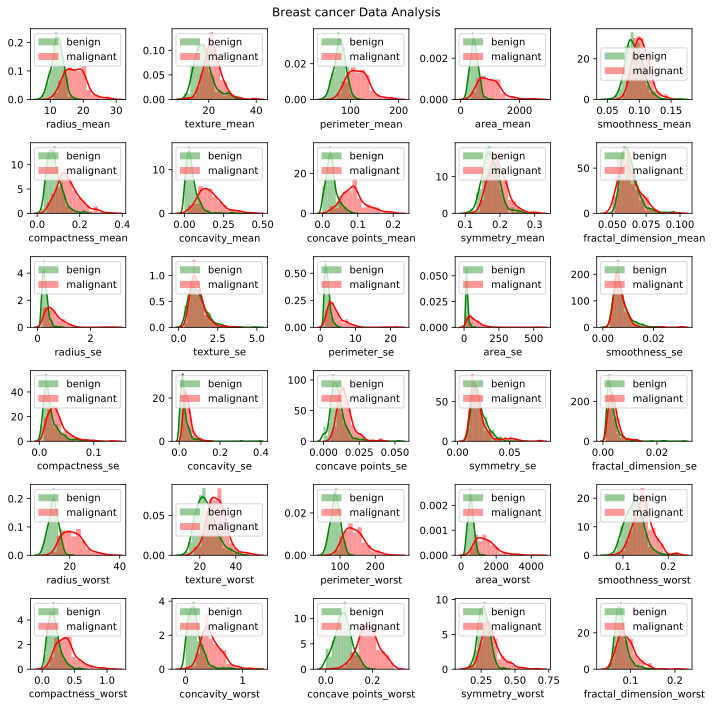

In [20]:
#frequency distribution of the features

result = pd.DataFrame()
result['diagnosis'] = df.diagnosis

fig = plt.figure(figsize = (10, 10))
j = 0
for i in x.columns:
    plt.subplot(6, 5, j+1)
    j += 1
    sns.distplot(x[i][result['diagnosis']=='B'], color = 'g', label = 'benign')
    sns.distplot(x[i][result['diagnosis']=='M'], color = 'r', label = 'malignant')
    plt.legend(loc='best')
    
fig.suptitle('Breast cancer Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
#Visualizing a pair plot of the whole features
#sns.pairplot(df, hue = 'diagnosis')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

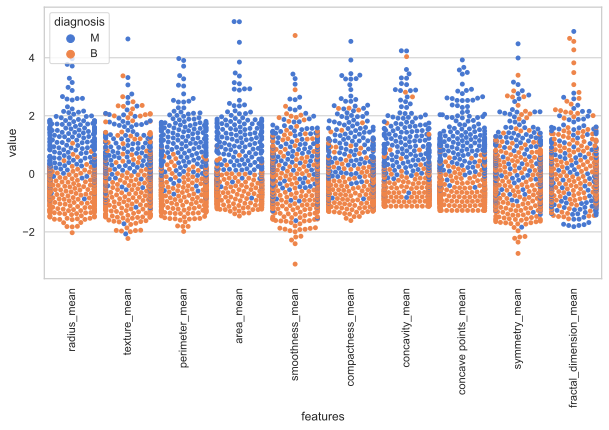

In [22]:
#Visualizing a swarm-plot of the Independent features

import time
sns.set(style = 'whitegrid', palette = "muted")
#normalizing the data before plotting
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())


data = pd.concat([y, data_n_2.iloc[:,0:10]], axis = 1)
data = pd.melt(data, id_vars='diagnosis',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(10,5))
tic = time.time()
sns.swarmplot(x='features', y='value', hue='diagnosis', data = data)
plt.xticks(rotation=90)




(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

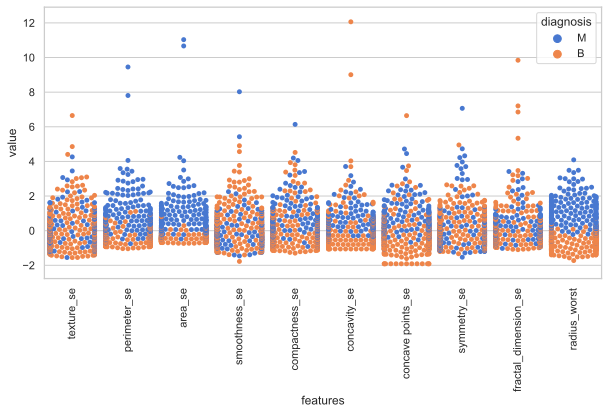

In [23]:
data = pd.concat([y, data_n_2.iloc[:,11:21]], axis = 1)
data = pd.melt(data, id_vars='diagnosis',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(10,5))
tic = time.time()
sns.swarmplot(x='features', y='value', hue='diagnosis', data = data)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

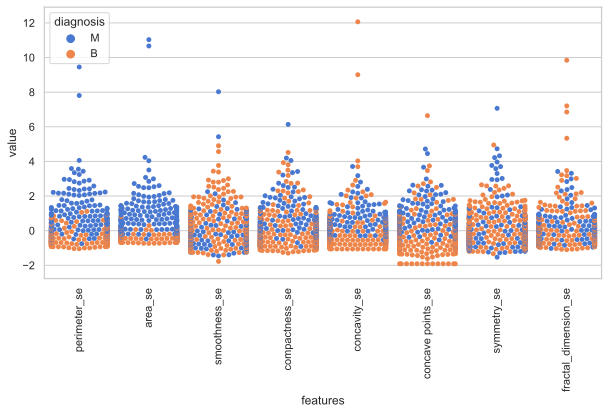

In [24]:
data = pd.concat([y, data_n_2.iloc[:,12:20]], axis = 1)
data = pd.melt(data, id_vars='diagnosis',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(10,5))
tic = time.time()
sns.swarmplot(x='features', y='value', hue='diagnosis', data = data)
plt.xticks(rotation=90)

**From the swarm plots above,
* features like concave points_mean, perimeter_mean, radius_worst show they will be good for classification as the distribution is divided unlike some features like symmetre_se, smoothness_se with no demarcation in their distribution

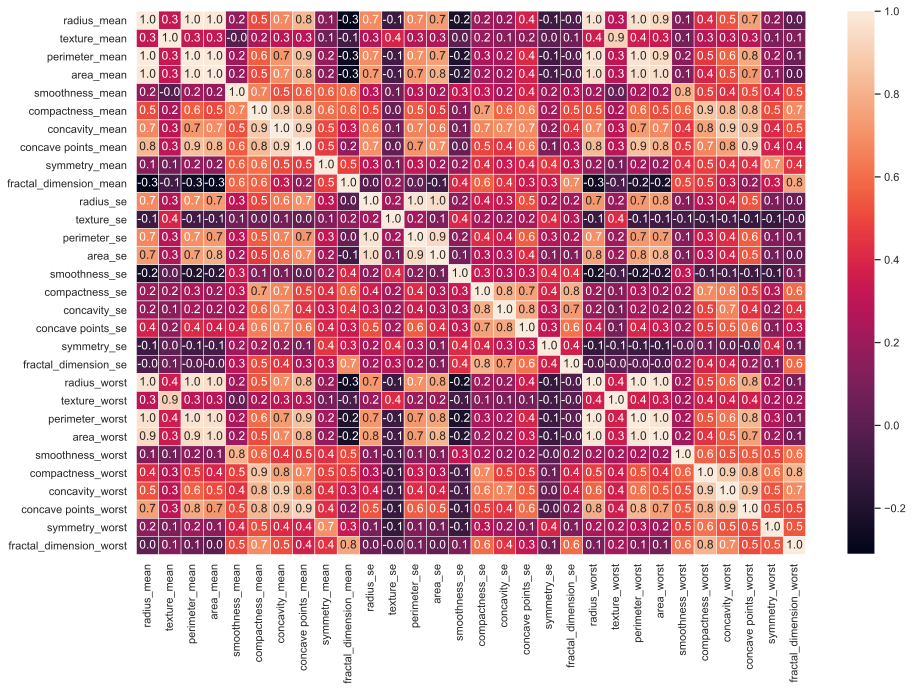

In [33]:
#Plotting the correlation matrix

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [9]:
#label encoding the target feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)




In [10]:
#spliting the data into testing and training samples
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### The following machine learning  classification algorithms will be used for prediction

* Logistic Regression, 
* kNN,
* SVC linear,
* SVC rbf,
* Guassian Naive bayes,
* Decision Tree classifier,
* Random forest classifier.


In [11]:
# create a function to accomodate the models


def models(x_train, y_train):
    #using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)
    
    #Using KNN Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(x_train, y_train)
    
    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)
    
    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

    #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)
    
    #Using RandomForest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)
    
    #Print model accuracy on training data
    
    
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))
    
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    
    

In [12]:
model = models(x_train, y_train)


[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9741784037558685
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9859154929577465
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9859154929577465
[4]Gaussian Naive Bayes Training Accuracy: 0.9483568075117371
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9976525821596244


### Model Evaluation

In [13]:
#showing the confusion matrix of each algorithm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
algo = ["LogisticRegression", "KNeighborsClassifier", "SVC_lin", "SVC_rbf", "GaussianNB", "DecisionTreeClassifier", "RandomForestClassifier"]
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print(cm)
    print('{} Testing Accuracy = "{}"'.format(algo[i], accuracy_score(y_test, model[i].predict(x_test))))
    print("===================================================================================")
    

[[87  3]
 [ 3 50]]
LogisticRegression Testing Accuracy = "0.958041958041958"
[[89  1]
 [ 6 47]]
KNeighborsClassifier Testing Accuracy = "0.951048951048951"
[[88  2]
 [ 2 51]]
SVC_lin Testing Accuracy = "0.972027972027972"
[[88  2]
 [ 3 50]]
SVC_rbf Testing Accuracy = "0.965034965034965"
[[84  6]
 [ 6 47]]
GaussianNB Testing Accuracy = "0.916083916083916"
[[86  4]
 [ 2 51]]
DecisionTreeClassifier Testing Accuracy = "0.958041958041958"
[[89  1]
 [ 1 52]]
RandomForestClassifier Testing Accuracy = "0.986013986013986"


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


for i in range(len(model)):
    print(i, algo[i])
    print(classification_report(y_test, model[i].predict(x_test)))
    
    print('accuracy on test data:' ,accuracy_score(y_test, model[i].predict(x_test)))
    print('=============================================================')
    print()

0 LogisticRegression
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

accuracy on test data: 0.958041958041958

1 KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

accuracy on test data: 0.951048951048951

2 SVC_lin
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97 

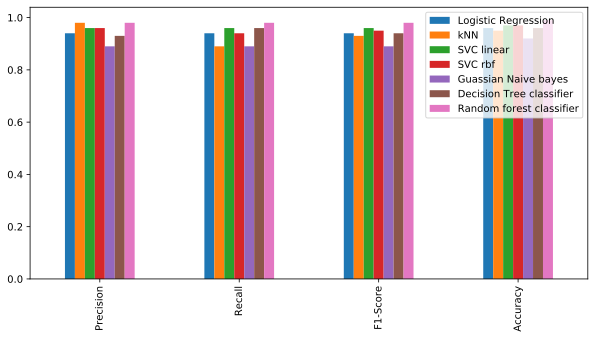

In [15]:
#Visualizing model performance comparism 

models_metrics = {'Logistic Regression' : [0.94, 0.94, 0.94, 0.96],
                  'kNN' : [0.98, 0.89, 0.93, 0.95],
                  'SVC linear': [0.96, 0.96, 0.96, 0.97],
                  'SVC rbf':[0.96, 0.94, 0.95, 0.97],
                  'Guassian Naive bayes':[0.89, 0.89, 0.89, 0.92],
                  'Decision Tree classifier':[0.93, 0.96, 0.94, 0.96],
                  'Random forest classifier':[0.98, 0.98, 0.98, 0.99]
                 }

table = pd.DataFrame(data = models_metrics)
table.rename(index={0:'Precision', 1:'Recall', 2:'F1-Score', 3:'Accuracy'}, inplace = True)
table.plot(kind = 'bar', figsize = (10,5))




**From the above model evaluations, RandomForest Classifier seems to be the best classifier on the testing data**


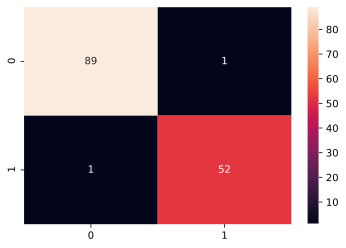

In [23]:
#visualizing the correlation matrix of RandomForest Classifier

cm = confusion_matrix(y_test, model[6].predict(x_test))
sns.heatmap(cm, annot=True, fmt='d')

### From the above plot

* True Positive(TP) i.e proportion of actual malignant cancer that are correctly identified as such = 52

* True Negative(TN) i.e proportion of actual Benign cancer that are correctly identified as such = 89

* False Positive(FP) i.e proportion of Benign cancer wrongly predicted as malignant = 1

* False Negative(TN) i.e proportion of Malignant cancer wrongly predicted as Benign = 1 

### To Evaluate the Influence of Feature Selection on the Models:

### Feature Selection with correlation matrix
From the correlation matrix, some features are highly correlated, i.e correlation > 0.9.
we'll be removing one of two/more highly correlated features

### From the correlation matrix

**Compactness_mean, concavity_mean and concave points_mean are correlated -> selecting concavity_mean**

**radius_se, perimeter_se and area_se are correlated -> selecting area_se.**

**radius_worst, perimeter_worst and area_worst are correlated -> selecting area_worst.**

**Compactness_worst, concavity_worst and concave points_worst are correlated -> selecting concavity_worst.**

**Compactness_se, concavity_se and concave points_se are correlated -> selecting concavity_se.**

**texture_mean and texture_worst are correlated are correlated -> selecting texture_mean.**

**area_worst and area_mean are correlated -> selecting area_mean.**

In [17]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']

x_corr_select = x.drop(drop_list, axis = 1)
x_corr_select.head()

texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0         10.38     1001.0          0.11840          0.3001         0.2419   
1         17.77     1326.0          0.08474          0.0869         0.1812   
2         21.25     1203.0          0.10960          0.1974         0.2069   
3         20.38      386.1          0.14250          0.2414         0.2597   
4         14.34     1297.0          0.10030          0.1980         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

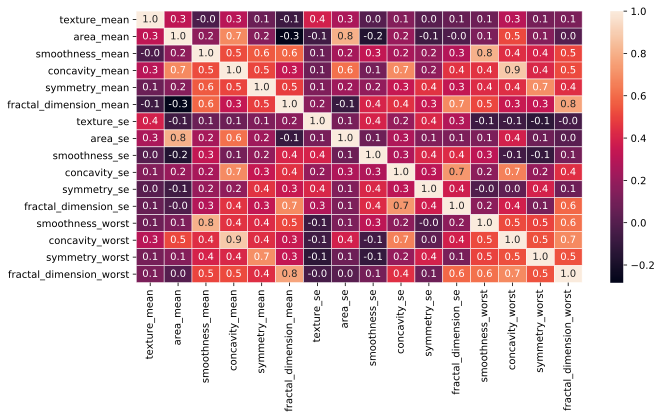

In [18]:
#Plotting the correlation matrix of the selected features
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(x_corr_select.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [20]:
#spliting the data into testing and training samples
from sklearn.model_selection import train_test_split
x_train_corr, x_test_corr, y_train_corr, y_test_corr = train_test_split(x_corr_select, y, test_size = 0.25, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_corr = sc.fit_transform(x_train_corr)
x_test_corr = sc.transform(x_test_corr)


In [21]:
model_corr = models(x_train_corr, y_train_corr)

[0]Logistic Regression Training Accuracy: 0.9812206572769953
[1]K Nearest Neighbor Training Accuracy: 0.9694835680751174
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9835680751173709
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9812206572769953
[4]Gaussian Naive Bayes Training Accuracy: 0.9553990610328639
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9929577464788732


In [22]:
#Getting accuracy on test data using selected features

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
algo = ["LogisticRegression", "KNeighborsClassifier", "SVC_lin", "SVC_rbf", "GaussianNB", "DecisionTreeClassifier", "RandomForestClassifier"]

for i in range(len(model_corr)):
    print(i, algo[i])
    print(classification_report(y_test_corr, model_corr[i].predict(x_test_corr)))
    
    print('accuracy on test data:' ,accuracy_score(y_test_corr, model_corr[i].predict(x_test_corr)))
    print('==============================================================')
    print()


0 LogisticRegression
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

accuracy on test data: 0.965034965034965

1 KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        90
           1       0.92      0.89      0.90        53

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

accuracy on test data: 0.9300699300699301

2 SVC_lin
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97

### From the comparison made,
#### using RandomForest and LogisticRegression algorithm

**SVC rbf Testing Acciracy**
   * All Features = 0.972
   * Selected Features(using Correlation) = 0.972

**RandomForest Testing Accuracy:**
   * All Features = 0.986
   * Selected Features(using Correlation) = 0.951
    
***LogisticRegression Testing Accuracy:**
   * All Features = 0.958
   * Selected Features(using Correlation) = 0.965

### In conclusion Feature selection doesnt depreciate the prediction accuracy